### Harrison Dow, Ryogo Katahira

# Lab 4: The Boltzmann and Saha equations

In this lab, we will see how to use the Boltzmann and Saha equations to estimate the strength of absorption lines in stellar spectra at different temperatures.

We will focus on the Balmer lines (hydrogen lines in the visible part of the spectrum, caused by transitions to/from the $n=2$ level of hydrogen).

We need to figure out how many atoms are available to make the Balmer lines. To do this, we need to answer the following questions:
1. How many atoms are ionized?
2. Of the non-ionized atoms, how many have electrons in the correct energy state ($n=2$)?

In [1]:
# as always, let's start by importing some useful packages

import astropy.units as u
import matplotlib.pyplot as plt
import numpy as np
from astropy.constants import h, m_e, k_B
from astropy.constants import u as atomicu

## Part 1: the Saha equation

To answer the first question ("How many atoms are ionized?"), we need the Saha equation. Below is a function that evaluates the Saha equation for a gas with arbitrary composition.

---

### Exercise 1

Complete the docstring in the function below by adding brief descriptions of all the input and output variables. The first input variable has been done for you as an example.

In [2]:
def saha(T,Z_i,Z_ii,E_ionize,n_e):
  ''' Calculate ratio of ionization states for gas of arbitrary composition.
  Inputs:
    T (float): temperature of the gas in K
    Z_i (float): Weighted sum of # of ways the atom can arrange its electrons in ionization state i
    Z_ii (float): Weighted sum of # of ways the atom can arrange its electrons in ionization state i+1
    E_ionize (float):Energy needed to remove electron from ground state in ionization state i in eV
    n_e (float): Number density in electrons in cm^-3

  Outputs:
    Nii_to_Ni (float): Ratio of # of atoms in ionization state i+1 to that of i
  '''

  T = T * u.K
  E_ionize = E_ionize * u.eV
  n_e = n_e * (u.cm)**-3

  Nii_to_Ni = 2*Z_ii/(n_e*Z_i)*(2*np.pi*m_e*k_B*T/h**2)**(3/2)*np.exp(-E_ionize/(k_B*T))
  Nii_to_Ni = Nii_to_Ni.decompose()
  return(Nii_to_Ni)

---

### Exercise 2

The `saha` function above requires us to input the partition function ($Z_i$) for each ionization state ($i$) of hydrogen. Recall that the partition function is a weighted sum of the number of ways electrons can be configured: $Z_{i} = \sum_{j=0}^{\infty}g_j \exp\left(-\frac{E_j - E_1}{kT}\right)$

a) What are the ionization states of hydrogen?

HI (one electron) and HII (no electron)



b) What is the partition function of *ionized* hydrogen? Explain your reasoning.

1 because there is no electron



---

Below is a function that calculates the partition function of *neutral* hydrogen, $Z_I$. Note that the equation for $Z$ (shown above) involves an infinite sum, which is computationally impossible for us to do. The following function instead approximates $Z_I$ using 3 terms.

In [3]:
def partition_H(T, n=3):
  ''' Calculate partition function for neutral hydrogen.
  Inputs:
    T (float or float array): temperature of the gas in K
    n (int): number of energy states to consider (default: n=3)

  Outputs:
    z (float or float array): partition function for input values of T
  '''

  if np.isscalar(T):
    E = -13.6*u.eV / np.power(np.arange(1,n+1),2)
    g = 2*np.arange(1,n+1)**2
    weights = g*np.exp(-(E-E[0])/(k_B * T*u.K))
    z = np.sum(weights)

  else:
    z = np.zeros_like(T)

    for i, temp in enumerate(T):
      E = -13.6*u.eV / np.power(np.arange(1,n+1),2)
      g = 2*np.arange(1,n+1)**2
      weights = g*np.exp(-(E-E[0])/(k_B * temp*u.K))
      z[i] = np.sum(weights)

  return z

---
### Exercise 3

Recall that the Saha equation gives us $N_{II}/N_{I}$. Unfortunately, that's not what we're really interested in!

For hydrogen gas at a given temperature, we want to know the fraction of hydrogen atoms that will *not* be ionized (because only neutral hydrogen has electrons that can make Balmer lines). So what we really want is $N_{I}/N_{\mathrm{total}}$.

Can you write $N_{I}/N_{\mathrm{total}}$ as a function of $N_{II}/N_{I}$?

$\frac{N_{I}}{N_{total}}=(1+\frac{N_{II}}{N_{I}})^{-1}$



---
### Exercise 4

Using your answers to Exercises 2 and 3, as well as the `saha` function in Exercise 1, make a plot of $N_{I}/N_{\mathrm{total}}$ as a function of temperature, ranging from 2000K to 30,000K. Assume an electron density of $10^{14}~\mathrm{cm}^{-3}$.

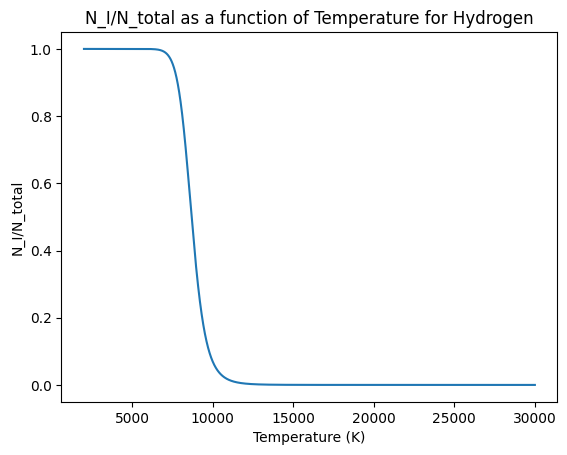

In [7]:
# your code here

temp = np.arange(2000, 30000, 1)
z = partition_H(temp, n=3)

# i=0
# for i in range(len(temp)):

y = (1+saha(temp, 1, z, 13.6, 10**14))**(-1)

# plt.axvline(x=7000)

plt.title('N_I/N_total as a function of Temperature for Hydrogen')
plt.xlabel('Temperature (K)')
plt.ylabel('N_I/N_total')
plt.plot(temp, y)
plt.show()

---
### Exercise 5

a) What does the plot above mean, physically?

b) Recall that this is $N_I/N_\mathrm{total}$ for *hydrogen*. Do you think the shape of this plot would look similar for other elements?

c) Around what temperature do you see a significant change in $N_I/N_\mathrm{total}$? Convert this temperature to a thermal energy $k_B T$. How does this thermal energy compare to the ionization energy of neutral hydrogen? How is it possible for these numbers to be so different?

a) It's the ratio between the number of atoms in the first ionization state (non ionized Hydrogen) and the total number of hydrogen atoms (ionized and non ionized Hydrogen). A ratio of 1 means that all the Hydrogen is not ionized, which happens at lower temperature, as temperature increases the ratio goes to zero, becuase all the atoms become ionized due to the great amount of energy.

b) The shape would be pretty similar, but it will reach a higher temperature before all the atoms are ionized.

c) Around 7000K. The thermal energy there is $k_{B}T=9.66 \times 10^{-20} J$. Compared to the ionization energy of neutral hydrogen, $13.6 eV = 2.18 \times 10^{-18} J$, it is smaller. It is because some hydrogen atoms already have electrons at higher energy states, which require less energy to be ionized. The temperature is also shows the average energy, so some hydrogens can be ionized with higher thermal energy.

In [10]:
(13.6 * u.eV).to(u.J)

<Quantity 2.17896022e-18 J>

## Part 2: the Boltzmann equation



Great! Now we need to know how many of the non-ionized hydrogen atoms have their electrons in the right state to be absorbed. To answer this question, we need the Boltzmann equation. Below is a function that evaluates the Boltzmann equation for a hydrogen gas.

---

### Exercise 6

In the function below, edit the docstring and comments (where marked with `EDIT HERE`) to explain what the function does.

In [11]:
def boltzmann_H(T,num,denom):
  '''
  Boltzmann Equation calculates the ratio of atoms with electrons in two energy states
  Inputs:
    T (float): temperature of the gas in K
    num (int): energy level in the numerator
    denom (int): energy level in the denominator

  Outputs:
    N_htol (float): The ratio of atoms with electrons in two energy states
  '''

  # Statistical Weight (number of possible states with a given energy)
  g_denom = 2*denom**2
  g_num = 2*num**2

  # Amount of electrostatic energy of an electron in a given shell
  E_denom = -13.6/denom**2*u.eV
  E_num = -13.6/num**2*u.eV

  # Defining the Boltzmann Equation
  N_htol = g_num/g_denom*np.exp(-(E_num-E_denom)/(k_B*T*u.K))

  return N_htol

---
Recall that in order to make Balmer lines, we need electrons to be in the $n=2$ state. We need to know the fraction of H atoms that have electrons in this state ($N_2$), compared to the total number of neutral H atoms ($N_I$): $N_2/N_I$.

The Boltzmann equation gives us $N_{i}/N_{j}$ for two different states $i$ and $j$. So to calculate $N_2/N_I$, we will need to do a sum of several Boltzmann ratios:

$N_2/N_I = \frac{N_2}{N_1 + N_2 + N_3 + ...} = \frac{1}{\frac{N_1 + N_2 + N_3 + ...}{N_2}} = \frac{1}{\frac{N_1}{N_2} + \frac{N_2}{N_2} + \frac{N_3}{N_2} + ...}$

This involves another infinite sum! Fortunately, for most reasonable temperatures, we know that nearly all HI atoms will have electrons in either the $n=1$ or the $n=2$ state. So we'll just use 2 terms:

$N_2/N_I = \frac{1}{\frac{N_1}{N_2} + \frac{N_2}{N_2}} = \frac{1}{\frac{N_1}{N_2} + 1}$

---
### Exercise 7

Using the formula above and the `boltzmann_h` function in Exercise 6, make a plot of $N_2/N_I$ as a function of temperature, ranging from 2000K to 30,000K.

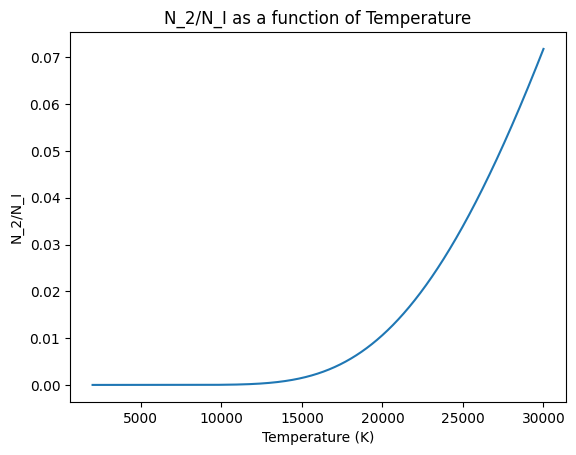

In [20]:
temp = np.arange(2000,30000,1)
y_1=1/(boltzmann_H(temp,1,2)+1)
plt.plot(temp,y_1)
plt.xlabel('Temperature (K)')
plt.ylabel("N_2/N_I")
plt.title('N_2/N_I as a function of Temperature')
plt.show()

---
### Exercise 8

a) What does the plot above mean, physically?

b) Recall that this is the fraction of neutral hydrogen atoms with electrons in the $n=2$ level. What do you think this plot would look like if we instead plotted the fraction of atoms with electrons in the $n=1$ level? The $n=3$ level? (You don't have to make the plots, just describe in words what you think they should look like.)

c) What is the difference between the $n=1$ and $n=2$ energy states in hydrogen? Recall that this is the energy required to excite an electron from the ground state to the $n=2$ state.

d) At what temperature do you start to see a significant change in $N_2/N_I$? Convert this temperature to a thermal energy $k_B T$. How does this thermal energy compare to your answer from part (c)? Again, how is it possible for these numbers to be so different?


a) As the temperature of the system increases, so does the thermal energy, and therefore electrons move to higher energy states (n=2 is the highest)

b)n=1 level would have a decreasing graph, as the electrons move from n=1 to n=2. The n=3 level would look similar to n=2 and increase, but the noticable increase starts at higher temperatures.

c) $E_{n}=\frac{-13.6 eV}{n^2}$
So the difference would be: $E_{2}-E_{1}=\frac{-13.6 eV}{2^2}-\frac{-13.6 eV}{1^2}=10.2 eV$


d) Around 14000K there is a significant change. $E_{th}=k_{B}T=1.21 eV$. This is much smaller than the energy necessary to move from n=1 to n=2 because the temperature is an average so at this point only a few electrons have enough energy to jump up an energy state.

In [21]:
(k_B*14000*u.K).to(u.eV)

<Quantity 1.20642666 eV>

## Part 3: Putting it all together

Now let's combine the Boltzmann and Saha equations to see at what temperature the Balmer lines will be strongest!

---
### Exercise 9

Using your answers from Exercises 4 and 6, plot the fraction of H atoms that are both neutral and have electrons in the $n=2$ state: $N_2/N_\mathrm{total} = \frac{N_2}{N_I}\times\frac{N_I}{N_\mathrm{total}}$

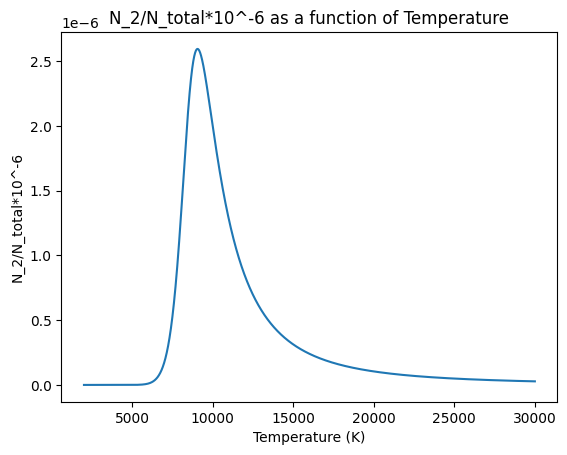

In [29]:
plt.plot(temp,y_1*y)
plt.xlabel('Temperature (K)')
plt.ylabel('N_2/N_total*10^-6')
plt.title('N_2/N_total*10^-6 as a function of Temperature')
#plt.axvline(x=9000)
plt.show()

---
### Exercise 10

Use your plot from above to answer the following questions.

a) What do you notice about the order of magnitude of the values on the y-axis? Is this more or less than what you expected?

b) At what temperature does your plot peak?

c) Look up the typical temperature of an A star. (Cite your source!) How does it compare to your answer to (b) above?

a) The magnitude is $10^{-6}$. This is much less than we expected.

b) Around 9000K.

c) A-type stars range from 7400K to 10000K, and 9000K is right within the range. That's why Balmer Lines are very appearent in A stars! https://www.britannica.com/science/A-type-star

---

### Submission Instructions

Before submitting any Google Colab notebook for grading, please follow the following steps

**1) Try running everything in one go (Runtime menu -> Restart and run all)**

Make sure the entire notebook runs from start to finish. If necessary, comment out any un-executable cells from the instructions portion of the lab so the whole notebook will execute in one go.

**2) Restart the kernel (Runtime menu --> Restart Runtime).**

**3) Clear all output (Edit --> clear all outputs).**

**4) Make sure the names of all group members are in a markdown cell at the top of the file and submit the notebook as a *.ipynb file on Gradescope**